In [1]:
import os
import random
import matplotlib.pyplot as plt
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten,Conv2D, MaxPooling2D,Dense
from   tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

## Mounting Google Drive


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
'Colab Notebooks'   FruitsClassi.rar  'GRE 1.pdf'   models
 flowers.rar	    Fruits.rar	      'GRE 2.pdf'  'My Drive'


## Exttracting Files on colab storage italicised text

In [ ]:
!unrar x /mydrive/flowers.rar

## Getting count of images in each category

In [4]:
names=[]
for folder in os.listdir('flowers'):
  names.append(folder)
  print(folder+': '+str(len(os.listdir('flowers/'+folder))))

sunflower: 734
daisy: 769
rose: 784
tulip: 984
dandelion: 1055


## Preparing Train and test data

In [5]:
!mkdir train
!mkdir test

In [6]:
for i in names:
  os.mkdir('train/'+i)
  os.mkdir('test/'+i) 

## Splitting 90-10

In [7]:
def split_data(source,train,test):
  files= []
  for filename in os.listdir(source):
    file = source + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + " is zero length, so ignoring.")

  training_length = int(len(files) * 0.9)
  testing_length = int(len(files) - training_length)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  testing_set = shuffled_set[-testing_length:]

  for filename in training_set:
    this_file = source + filename
    destination = train + filename
    copyfile(this_file, destination)

  for filename in testing_set:
    this_file = source + filename
    destination = test + filename
    copyfile(this_file, destination)

  print('Done')

In [8]:
for i in names:
  split_data('flowers/'+i+'/','train/'+i+'/','test/'+i+'/')

Done
Done
Done
Done
Done


In [9]:
print('Train Set')
for folder in os.listdir('train'):
  print(folder+': '+str(len(os.listdir('train/'+folder))))
print()
print('Test Set')
for folder in os.listdir('test'):
  print(folder+': '+str(len(os.listdir('test/'+folder))))  

Train Set
sunflower: 660
daisy: 692
rose: 705
tulip: 885
dandelion: 949

Test Set
sunflower: 74
daisy: 77
rose: 79
tulip: 99
dandelion: 106


# Model Architecture

## Model 1

In [10]:
customModel1 = Sequential([
    # The first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [11]:
customModel1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

Data Augmentation and Feeding image through nn



In [12]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	'train',
	target_size=(150,150),
	class_mode='categorical',
  batch_size=64
)

validation_generator = validation_datagen.flow_from_directory(
	'test',
	target_size=(150,150),
	class_mode='categorical',
  batch_size=64
)

Found 3888 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


In [13]:
customModel1.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history=customModel1.fit(train_generator, epochs=50, steps_per_epoch=40, validation_data = validation_generator, verbose = 1, validation_steps=7)

Epoch 1/50
40/40 [==============================] - 19s 482ms/step - loss: 1.3975 - accuracy: 0.3667 - val_loss: 1.1680 - val_accuracy: 0.4920
Epoch 2/50
40/40 [==============================] - 19s 472ms/step - loss: 1.1974 - accuracy: 0.4762 - val_loss: 1.1553 - val_accuracy: 0.5218
Epoch 3/50
40/40 [==============================] - 19s 468ms/step - loss: 1.1217 - accuracy: 0.5425 - val_loss: 1.0223 - val_accuracy: 0.5609
Epoch 4/50
40/40 [==============================] - 19s 471ms/step - loss: 1.0363 - accuracy: 0.5879 - val_loss: 0.9587 - val_accuracy: 0.5931
Epoch 5/50
40/40 [==============================] - 19s 468ms/step - loss: 0.9469 - accuracy: 0.6254 - val_loss: 0.9069 - val_accuracy: 0.6414
Epoch 6/50
40/40 [==============================] - 19s 466ms/step - loss: 0.9182 - accuracy: 0.6537 - val_loss: 0.9925 - val_accuracy: 0.5816
Epoch 7/50
40/40 [==============================] - 19s 475ms/step - loss: 0.9031 - accuracy: 0.6438 - val_loss: 1.0372 - val_accuracy: 0.5747

Plotting Loss and Accuracy

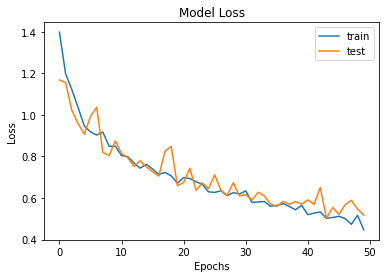

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

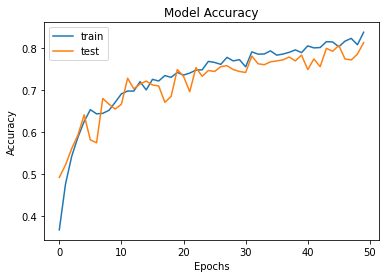

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

## Model 2

In [16]:
customModel2=Sequential([
    Conv2D(32, (5,5), padding='Same',activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2,2)), 

    Conv2D(64, (3,3), padding='Same',activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    Conv2D(96, (3,3), padding='Same',activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    Conv2D(96, (3,3), padding='Same',activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])

In [17]:
customModel2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 96)       

In [ ]:
customModel2.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
History=customModel2.fit(train_generator, epochs=50, steps_per_epoch=61, validation_data = validation_generator, verbose = 1, validation_steps=7)

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# What the conv layers see

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


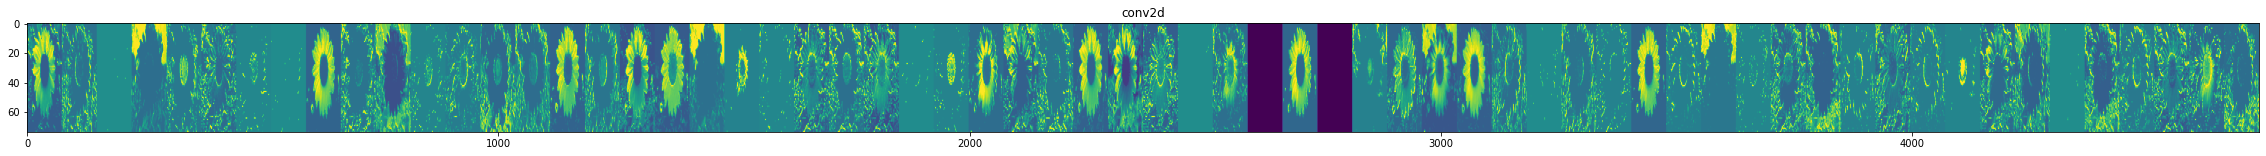

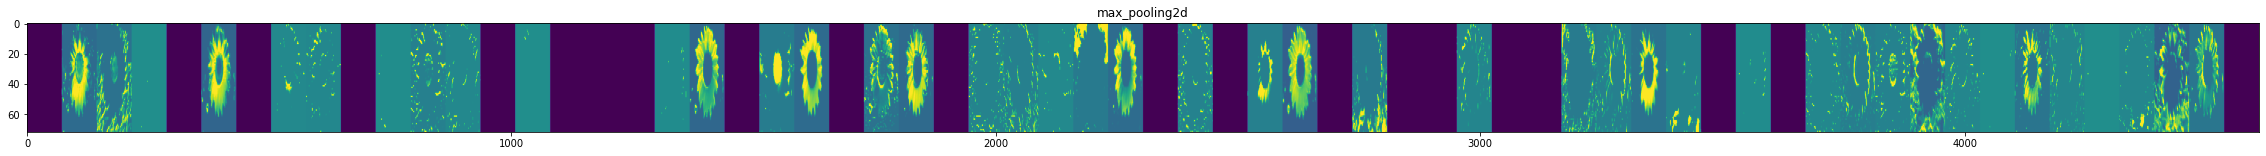

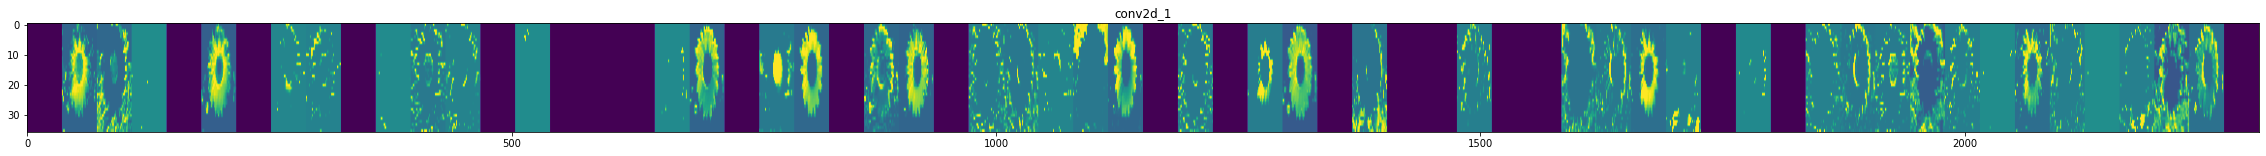

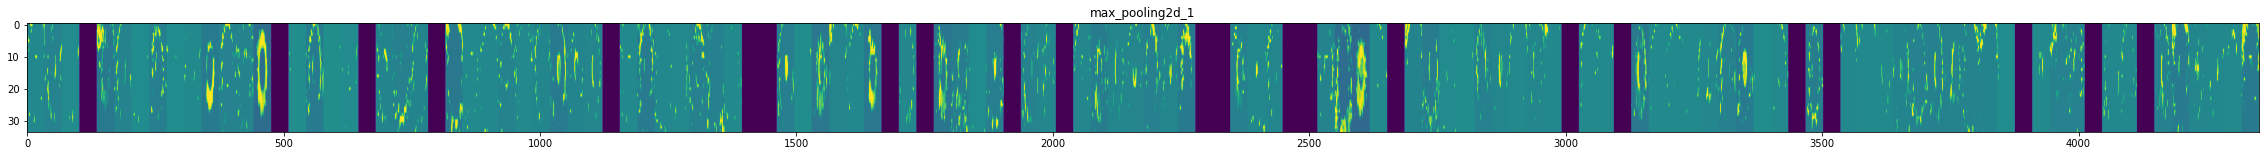

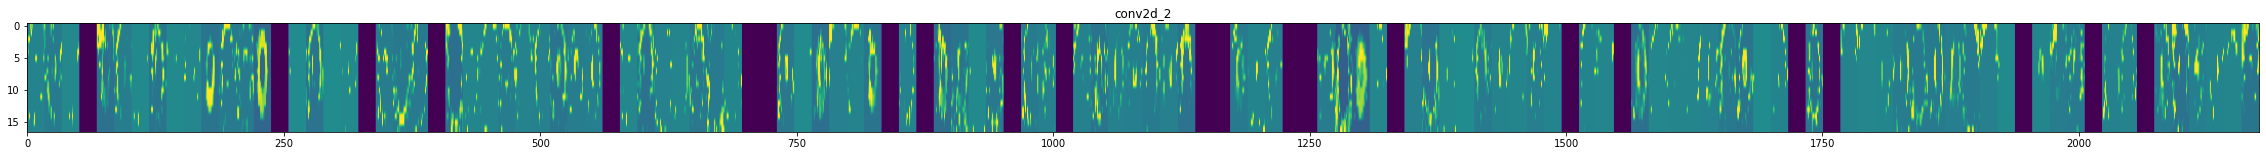

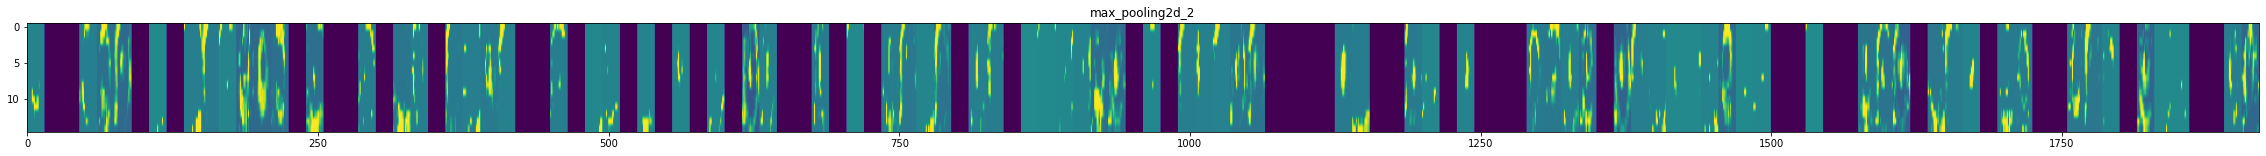

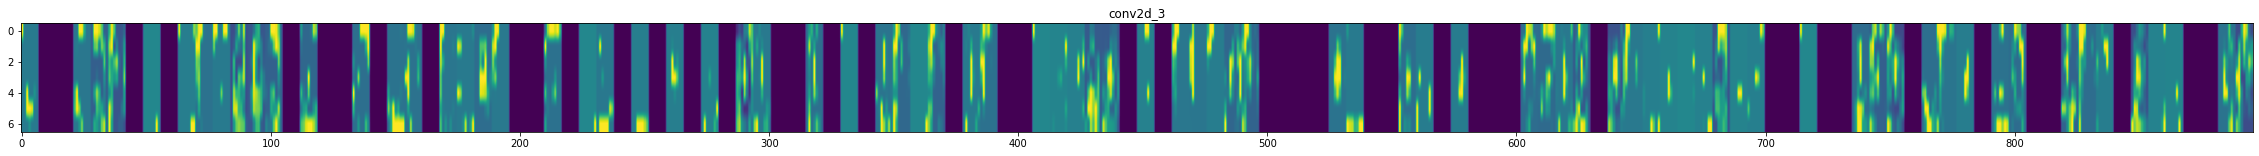

In [23]:
successive_outputs = [layer.output for layer in customModel1.layers[1:]]#getting output of all layers
visualization_model = tf.keras.models.Model(inputs = customModel1.input, outputs = successive_outputs)#visualization_model = Model(img_input, successive_outputs)
sunflowerfnames = [os.path.join('train/sunflower', f) for f in os.listdir('train/sunflower/')]#getting all image names
img_path = random.choice(sunflowerfnames)#selecting a random image
img = load_img(img_path, target_size=(150, 150,3))# this is a PIL image
x = img_to_array(img)# Numpy array with shape (150, 150, 3)
x = np.expand_dims(x,axis=0)# Numpy array with shape (1, 150, 150, 3) 
x /= 255.0#normalizing
successive_feature_maps = visualization_model.predict(x)#forward_prop through all layers and getting all intermediate representations of image
layer_names = [layer.name for layer in customModel1.layers]#getting all layer names to label in plot
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape)==4:#we need visulaization only for conv and max pool layers
    n_features = feature_map.shape[-1]# number of features in the feature map
    size       = feature_map.shape[ 1]# feature map shape (1, size, size, n_features)
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    plt.figure( figsize=(40,2) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [24]:
img=load_img('sunflower.jpeg', target_size=(150, 150,3))
x=img_to_array(img)
x=np.expand_dims(x, axis=0)
out = customModel1.predict(x)
out

array([[0., 0., 0., 1., 0.]], dtype=float32)